In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
files = [f'data/Cases-{i}.csv' for i in range(5)]
dataframes = [pd.read_csv(file) for file in files]
df = pd.concat(dataframes, ignore_index = True)

C:\Users\Neil\AppData\Local\Temp\ipykernel_24112\1103290739.py:2: DtypeWarning: Columns (16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframes = [pd.read_csv(file) for file in files]
C:\Users\Neil\AppData\Local\Temp\ipykernel_24112\1103290739.py:2: DtypeWarning: Columns (8,11,19,21) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframes = [pd.read_csv(file) for file in files]


In [3]:
df.head(5)

,CaseCode,Age,AgeGroup,Sex,DateSpecimen,DateResultRelease,DateRepConf,DateDied,DateRecover,RemovalType,...,ProvRes,CityMunRes,CityMuniPSGC,BarangayRes,BarangayPSGC,HealthStatus,Quarantined,DateOnset,Pregnanttab,ValidationStatus
0,C404174,38.0,35 to 39,FEMALE,NaN,2020-01-30,2020-01-30,NaN,NaN,RECOVERED,...,NEGROS ORIENTAL,DUMAGUETE CITY (CAPITAL),PH074610000,NaN,NaN,RECOVERED,NO,2020-01-21,NO,"Removal Type is ""Recovered"", but no Recovered ..."
1,C462688,44.0,40 to 44,MALE,NaN,2020-01-30,2020-02-03,2020-02-01,NaN,DIED,...,NEGROS ORIENTAL,DUMAGUETE CITY (CAPITAL),PH074610000,NaN,NaN,DIED,NO,2020-01-18,NaN,NaN
2,C387710,60.0,60 to 64,FEMALE,2020-01-23,2020-01-30,2020-02-05,NaN,2020-01-31,RECOVERED,...,BOHOL,PANGLAO,PH071233000,NaN,NaN,RECOVERED,NO,2020-01-21,NO,Case has Admitting Facility but is not Admitte...
3,C377460,49.0,45 to 49,MALE,NaN,NaN,2020-03-06,NaN,NaN,RECOVERED,...,BATANGAS,SANTO TOMAS,PH041028000,NaN,NaN,RECOVERED,NO,NaN,NaN,Case has Admitting Facility but is not Admitte...
4,C498051,63.0,60 to 64,MALE,2020-03-05,NaN,2020-03-06,2020-03-11,NaN,DIED,...,RIZAL,CAINTA,PH045805000,NaN,NaN,DIED,NO,NaN,NaN,Age or Birthdate is Invalid\nCase has Lab Resu...


check schema and null values

In [4]:
print(df.columns)

Index(['CaseCode', 'Age', 'AgeGroup', 'Sex', 'DateSpecimen',
       'DateResultRelease', 'DateRepConf', 'DateDied', 'DateRecover',
       'RemovalType', 'DateRepRem', 'Admitted', 'RegionRes', 'ProvRes',
       'CityMunRes', 'CityMuniPSGC', 'BarangayRes', 'BarangayPSGC',
       'HealthStatus', 'Quarantined', 'DateOnset', 'Pregnanttab',
       'ValidationStatus'],
      dtype='object')


In [5]:
df.count()

CaseCode             4136488
Age                  4124590
AgeGroup             4124590
Sex                  4136487
DateSpecimen         3160932
DateResultRelease    3160257
DateRepConf          4136488
DateDied               66186
DateRecover           732034
RemovalType          4134715
DateRepRem           4134715
Admitted             3962865
RegionRes            4132606
ProvRes              4079119
CityMunRes           4030963
CityMuniPSGC         4024992
BarangayRes          3767422
BarangayPSGC         3761581
HealthStatus         4136488
Quarantined          4021265
DateOnset            1491934
Pregnanttab          2067561
ValidationStatus     4089563
dtype: int64

In [6]:
missing_data = df.isnull().mean() * 100
print(missing_data)


CaseCode              0.000000
Age                   0.287635
AgeGroup              0.287635
Sex                   0.000024
DateSpecimen         23.584161
DateResultRelease    23.600479
DateRepConf           0.000000
DateDied             98.399947
DateRecover          82.303007
RemovalType           0.042862
DateRepRem            0.042862
Admitted              4.197353
RegionRes             0.093848
ProvRes               1.386901
CityMunRes            2.551077
CityMuniPSGC          2.695427
BarangayRes           8.922206
BarangayPSGC          9.063413
HealthStatus          0.000000
Quarantined           2.785527
DateOnset            63.932350
Pregnanttab          50.016512
ValidationStatus      1.134416
dtype: float64


In [34]:
df.dtypes

CaseCode                     object
Age                         float64
AgeGroup                     object
Sex                          object
DateSpecimen         datetime64[ns]
DateResultRelease    datetime64[ns]
DateRepConf          datetime64[ns]
DateDied             datetime64[ns]
DateRecover          datetime64[ns]
RemovalType                  object
DateRepRem           datetime64[ns]
Admitted                     object
RegionRes                    object
ProvRes                      object
CityMunRes                   object
CityMuniPSGC                 object
BarangayRes                  object
BarangayPSGC                 object
HealthStatus                 object
Quarantined                  object
DateOnset            datetime64[ns]
Pregnanttab                  object
ValidationStatus             object
dtype: object

assert data types and data cleaning

In [8]:
date_columns = ['DateSpecimen', 'DateResultRelease','DateRepConf', 'DateDied', 'DateRecover', 'DateRepRem', 'DateOnset']
num_columns = ['Age']

In [9]:
for date in date_columns:
    df[date] = pd.to_datetime(df[date], errors= 'coerce')

for num in num_columns:
    df[num] = pd.to_numeric(df[num], errors = 'coerce')

In [44]:
# uses the removal type and DateRepRem column to infer recoveries and deaths, more reliable and cleaner

infer_deaths = df[df['RemovalType'] == 'DIED']
infer_recoveries = df[df['RemovalType'] == 'RECOVERED']

In [ ]:
# returns a series of dates, along with the number of instances of the date (e.g. number of cases for that day)

cases = df.groupby('DateRepConf').size()
deaths = infer_deaths.groupby('DateRepRem').size()
recoveries = infer_recoveries.groupby('DateRepRem').size()

3933405

In [61]:
# confirm to real life figures: 4140863 / 66864 / 4067381

df_items = [cases, recoveries, deaths]
real_figures = [4140863, 4067381,  66864]

def confirm_values(df_items: list, real_figures: list) -> list:
    results = []
    for item, figure in zip(df_items, real_figures):
        accuracy = (item.values.sum())/figure
        results.append(accuracy)
    return results
    
confirm_values(df_items, real_figures)

[0.9659822119205586, 0.9670608679147589, 0.9928212491026561]

visualization

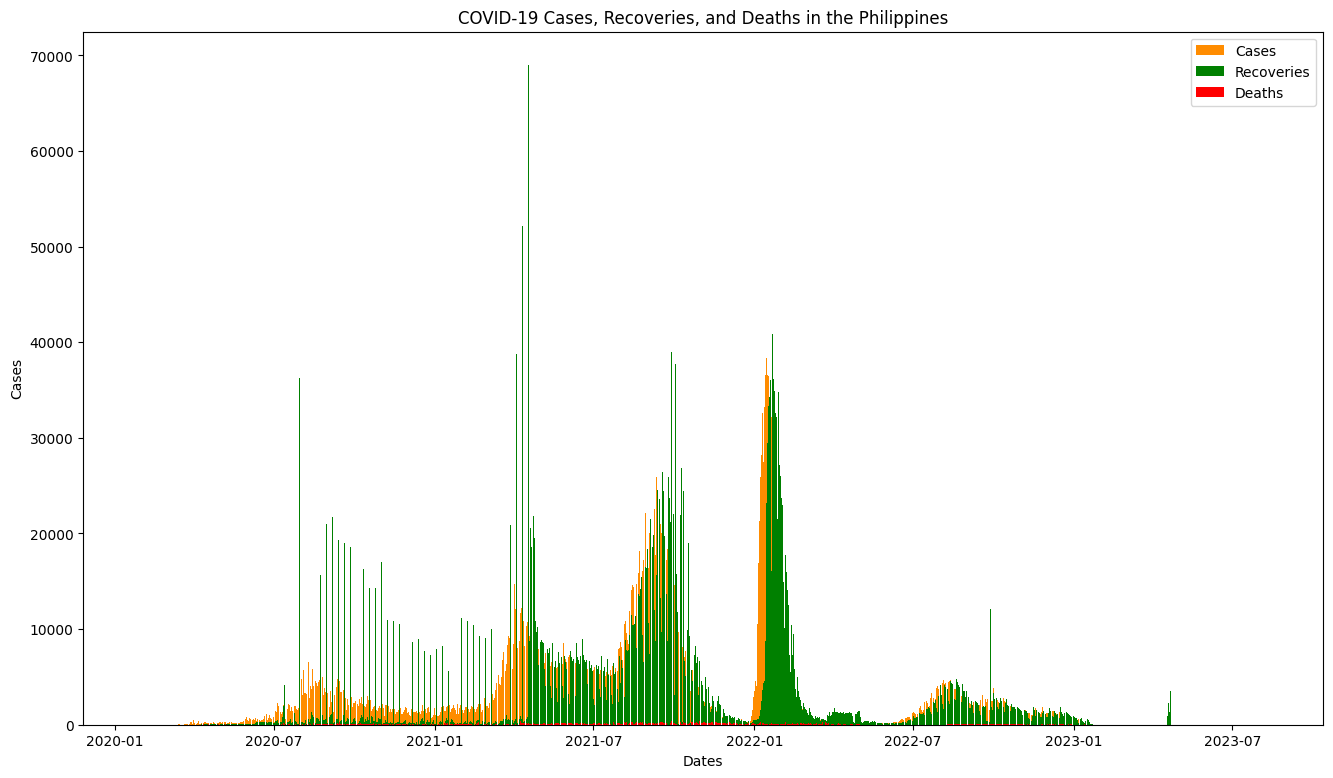

In [73]:
plt.figure(figsize=(16,9))
plt.bar(cases.index, cases.values, label = 'Cases', color = 'darkorange', width = 0.9)
plt.bar(recoveries.index, recoveries.values, label = 'Recoveries', color = 'green', width = 0.9)
plt.bar(deaths.index, deaths.values, label = 'Deaths', color = 'red', width = 0.9)

plt.title('COVID-19 Cases, Recoveries, and Deaths in the Philippines')
plt.xlabel('Dates')
plt.ylabel('Cases')
plt.legend()
plt.show()
